<a href="https://colab.research.google.com/github/manish-anandani/Data-Science-Projects/blob/main/Reducing_Dimensionality_using_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives

At the end of the project, we will be able to

* Use dimensionality reduction on Iris dataset using Princple Component Ananlysis

### Import Required Packages

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image              # to import images in notebook
import sympy as sy
import scipy as sc
from pprint import pprint
%matplotlib inline

### Principal Component Analysis

The problem we face when analyzing higher-dimensional datasets is referred to as “The curse of dimensionality”. Principal component analysis or PCA is known as a dimensionality reduction technique.

Steps to implement PCA:

* Subtract the mean of each variable so that the dataset will be centered on the origin.
* Calculate the Covariance Matrix
* Compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix. The Eigenvectors of the Covariance matrix are Orthogonal to each other and each vector represents a principal axis. A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

* Sort Eigenvalues in descending order: each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.

* Select a subset from the rearranged Eigenvalue matrix as per need
* Transform the data: transform the data by having a dot product between the transpose of the Eigenvector subset and the transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

In below example we will see how PCA works.

In [8]:
# Write a function for PCA
def PCA(X , num_components):

    # Subtract the mean
    X_meaned = X - np.mean(X , axis = 0)
    print('X_meaned',X_meaned)
    print(X_meaned.shape)

    # Calculate the covariance matrix
    cov_mat = np.cov(X_meaned , rowvar = False)

    # Compute the eigen values and eigen vectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    print('eigen_values , eigen_vectors', eigen_values , eigen_vectors)
    # Sort the eigen values in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    print('sorted_index', sorted_index)
    sorted_eigenvalue = eigen_values[sorted_index]
    print('sorted_eigenvalue', sorted_eigenvalue)
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    print('sorted_eigenvectors', sorted_eigenvectors)

    # Select a subset
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    print('eigenvector_subset',eigenvector_subset)

    # Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    print('eigenvector_subset.transpose() , X_meaned.transpose()', eigenvector_subset.transpose() , X_meaned.transpose())

    return X_reduced



**Dataset**

The dataset we use here for performing principal component analysis is Iris dataset. It contains four features (length and width of sepals and petals measured in cm) of 50 samples of three species of Iris plant (Iris setosa, Iris virginica and Iris versicolor).

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width= 500 px/>

In [9]:
# Import Iris Dataset
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

data = pd.DataFrame(X, columns=iris.feature_names)
data = pd.concat([data , pd.DataFrame(y, columns= ['target'])] , axis = 1)
# # data.shape, len(data)
for i in range(len(data)):
    if data.loc[i, 'target'] == 0:
        data.loc[i, 'target'] = iris.target_names[0]
    if data.loc[i, 'target'] == 1:
        data.loc[i, 'target'] = iris.target_names[1]
    if data.loc[i, 'target'] == 2:
        data.loc[i, 'target'] = iris.target_names[2]
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


X_meaned      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.743333          0.442667             -2.358         -0.999333
1            -0.943333         -0.057333             -2.358         -0.999333
2            -1.143333          0.142667             -2.458         -0.999333
3            -1.243333          0.042667             -2.258         -0.999333
4            -0.843333          0.542667             -2.358         -0.999333
..                 ...               ...                ...               ...
145           0.856667         -0.057333              1.442          1.100667
146           0.456667         -0.557333              1.242          0.700667
147           0.656667         -0.057333              1.442          0.800667
148           0.356667          0.342667              1.642          1.100667
149           0.056667         -0.057333              1.342          0.600667

[150 rows x 4 columns]
(150, 4)
eigen_values , eigen_v

<Axes: xlabel='PC1', ylabel='PC2'>

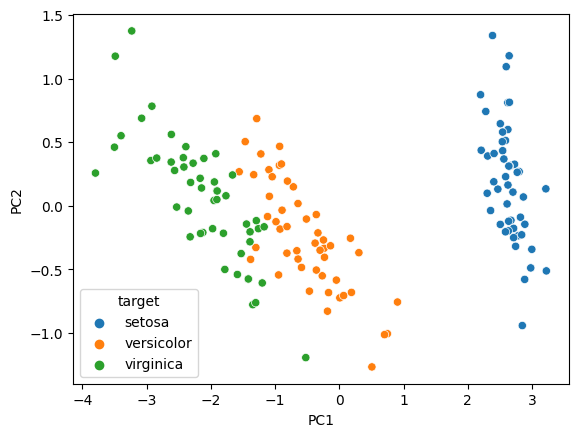

In [10]:
# Prepare the data
x = data.iloc[:,0:4]

# Prepare the target
target = data.iloc[:,4]

# Applying it to PCA function
mat_reduced = PCA(x, 2)

# Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

# Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target, columns= ['target'])] , axis = 1)
print(principal_df.head())
sns.scatterplot(data = principal_df, x= 'PC1', y= 'PC2', hue= 'target')

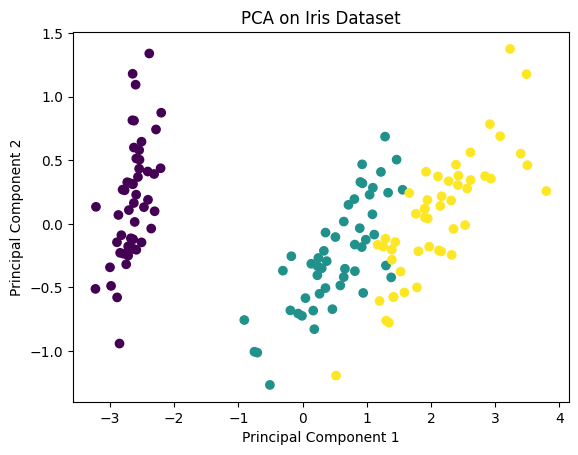

In [11]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components to keep
X_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()

From the above plot, it can be seen even after reducing the data to only two variables its variability is still intact.